<a href="https://colab.research.google.com/github/IR04dy/ML-models/blob/main/QuantileTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data = pd.read_csv("drawndata1.csv")

In [ ]:
data.head(4)

,rowid,x,y,z
0,1,58.080365,225.699042,a
1,2,238.867357,247.456645,a
2,3,156.218212,286.588782,a
3,4,262.004361,284.251445,a


In [ ]:
x = data[['x','y']].values
y = data['z'] == 'a'

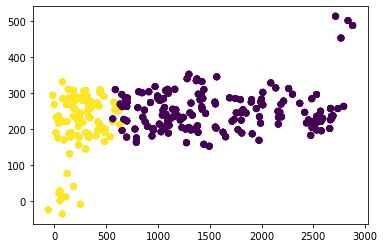

In [ ]:
plt.scatter(x[:, 0],x[:,1], c=y);

In [ ]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

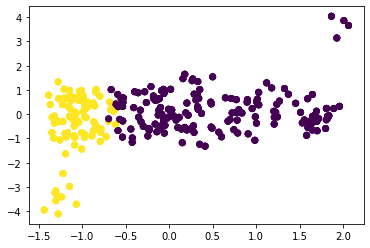

In [ ]:
_x = StandardScaler().fit_transform(_x)
plt.scatter(_x[:, 0],_x[:,1], c=y);

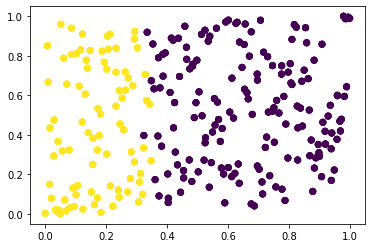

In [ ]:
X = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X[:, 0],X[:,1], c=y);

In [ ]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(x, y).predict(x)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.title("Original Data")

    plt.subplot(132)
    X_tfm = scaler.transform(x)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, x[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, x[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

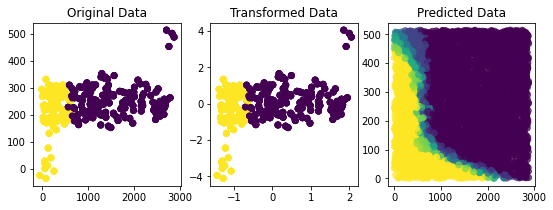

In [ ]:
plot_output(scaler=StandardScaler())

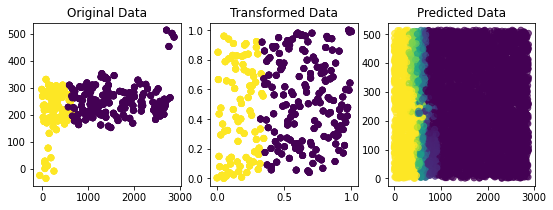

In [ ]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

In [ ]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()